# Dataset covid-19

## Le choix du dataset

#### j'ai choisir ce dataset sur covid car :
#### - De la situation sanitaire que le monde est confronte cette covid-19 (qui a eu des consequences sur plusieur plan surtout humanitaire et aussi economique)
#### - L'analyse de ce dataset m'interesse beaucoup afin de comprendre comment on detecte cette malide chez un individus avec ces differentes resultat clinique

## Le travail effectué :

#### - En premiere lieu on va exploiter et analyser le dataset en identififiant les donnees qui sont utilile pour la prediction de nouveau cas de covid 


#### - Ensuite ,une fois ce donnees identifie, on pourra ensuite passer au pre-traitement de ces donnees afin de leur donnee des formats propice pour  le developpement des modeles de machine learning
#### - Enfin , on passe a la modelisation en (en creant des modeles de machine learning,les entrainer , les evaluer et les optimiser )


## Les méthodes utilisées
#### a suivre

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [70]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [71]:
data = pd.read_excel('dataset.xlsx')

In [72]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1- Exploitation et Analyse du dataset

In [73]:
# d'abord fait une copy afin de ne pas d'erreur dans le dataset originale
dcy=data.copy()

In [74]:
# voir sa dimension( 5644 ligne et 111 colonnes)
dcy.shape

(5644, 111)

In [75]:
# voir les differentes type de donnees contenu dans le dataset

dcy.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

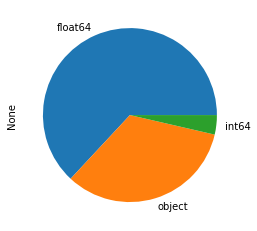

In [76]:
# voir les differentes type de donnees contenu dans le dataset sur un graphe

dcy.dtypes.value_counts().plot.pie()

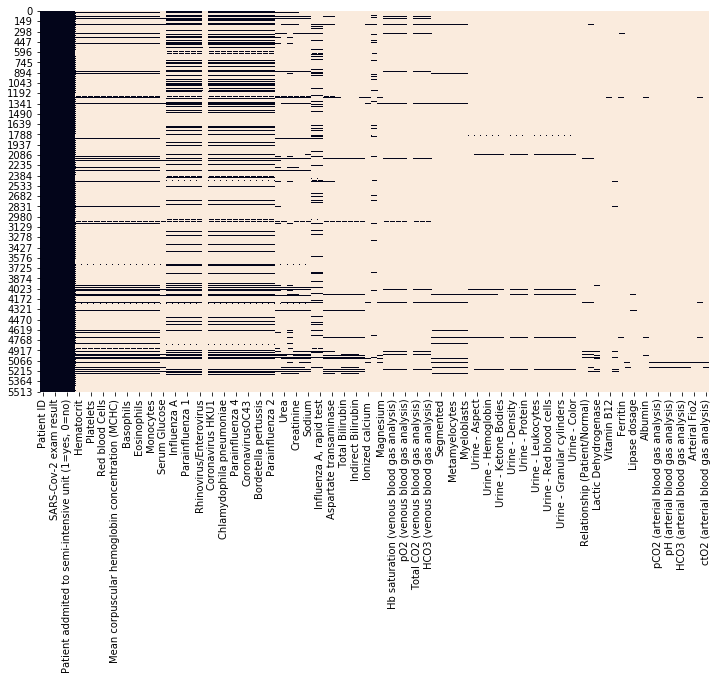

In [77]:
# ensuite voir les donnees manquants en pourcentage

plt.figure(figsize=(12,7))
sns.heatmap((dcy.isna()) , cbar=False)


#ce graphe montre que le dataset contient beaucoup de donnees manquantes  

In [78]:
# ensuite voir les donnees manquants en pourcentage
# les pourcentages montre qu'il y a plusieurs donnees manquantes 
(dcy.isna().sum()/dcy.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [79]:
#a parir d'ici on peut commencer a conserve les colonnes qui ont un pourcentage de donnees manquantes inferieur a 
# 0,90 car les autres qui depasser le bar des 0,9 sont inutile


dcy = dcy[dcy.columns[dcy.isna().sum()/dcy.shape[0] <0.9]]
dcy.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


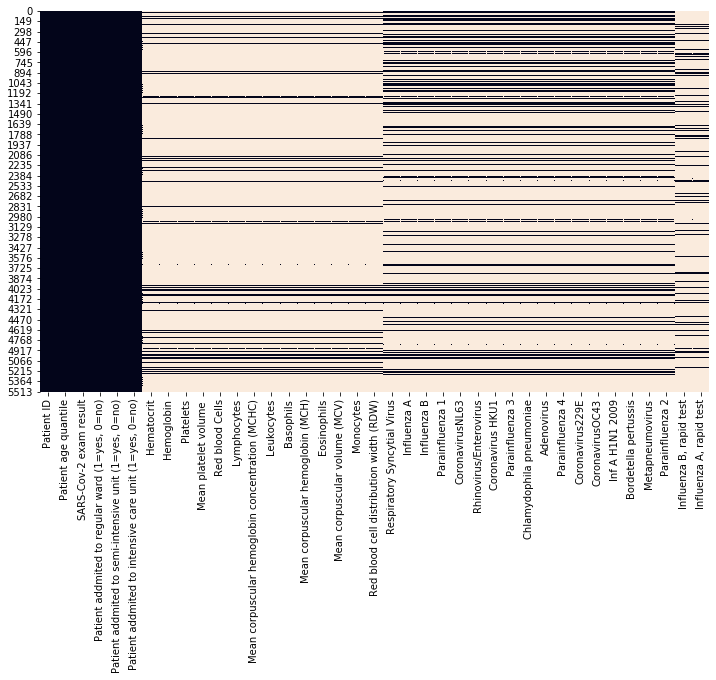

In [80]:
plt.figure(figsize=(12,7))
sns.heatmap((dcy.isna()) , cbar=False)
#on voir ici que les colonnes utile pour analyse ont ete consever

In [81]:
# on va commencer a analyse les colonnes restants
# en commencant pour notre colonne cible ou a predire (colonne = SARS-Cov-2 exam result)

dcy['SARS-Cov-2 exam result'].value_counts()
# on a 558 positive  et 5086 neagtive

positive = dcy[dcy['SARS-Cov-2 exam result'] == 'positive']

negative = dcy[dcy['SARS-Cov-2 exam result'] == 'negative']

In [82]:
#voir les donnes presentes dans la colonne Patient age quantile
dcy['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

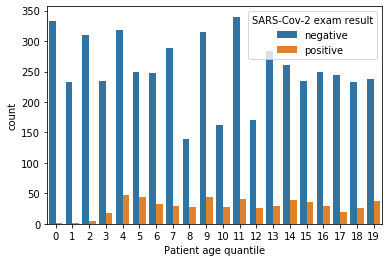

In [83]:
# on va analyser target(SARS-Cov-2 exam result) en fonction du colonne Patient age quantile
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=dcy)

#### on remarque  les individus de faible age sont tres peu contaminés 

### on va diviser les colonnes qui contient des donnes manquantes en deux sous-ensembles afin de savoir lequel d'entre eux serait plus utile pour la prediction

In [84]:
data_manquant = dcy.isna().sum()/dcy.shape[0]
data_manquant.sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

In [85]:
ensemble1= dcy.columns[(data_manquant < 0.9) & (data_manquant >0.88)]
ensemble1

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [86]:
ensemble2= dcy.columns[(data_manquant < 0.88) & (data_manquant >0.75)]
ensemble2

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

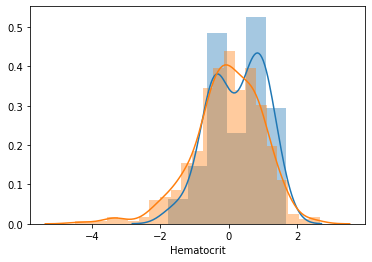

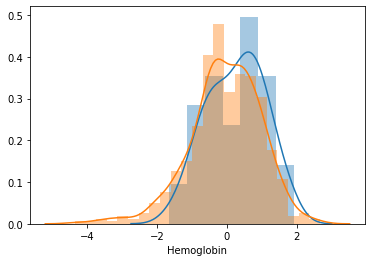

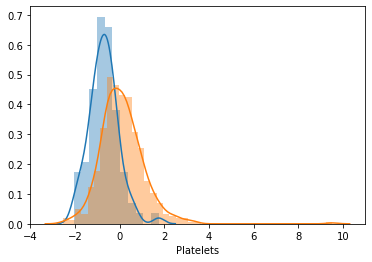

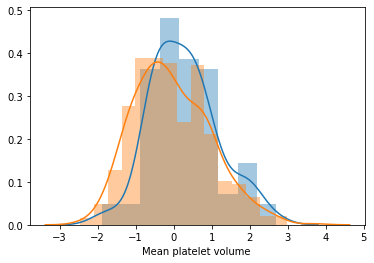

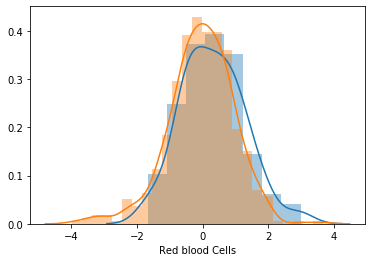

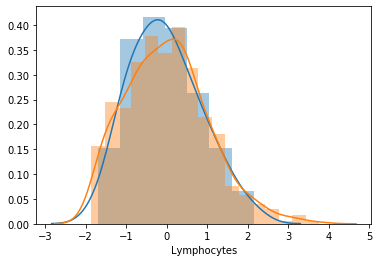

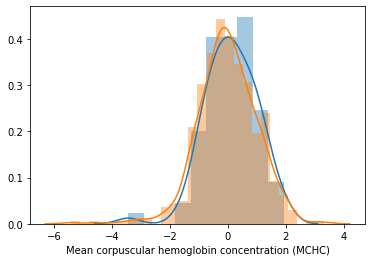

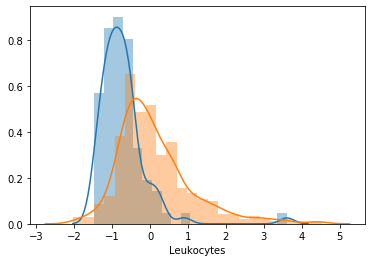

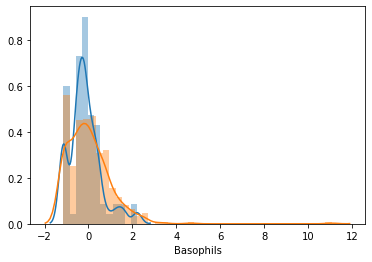

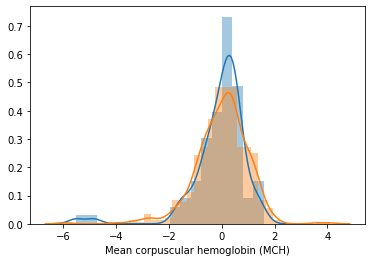

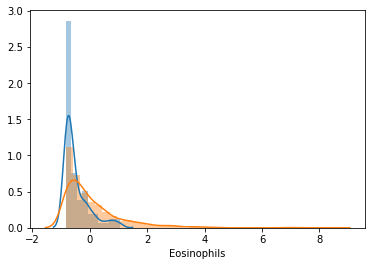

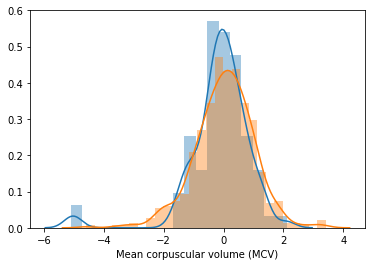

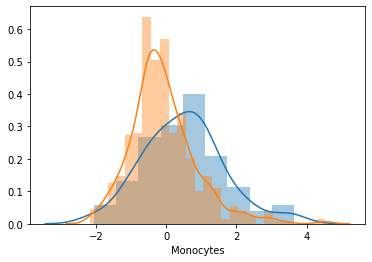

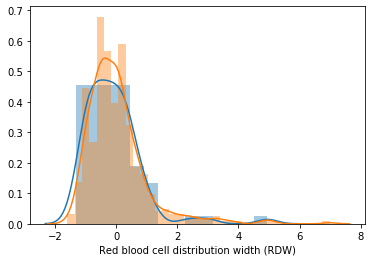

In [87]:
#anlyse target(SARS-Cov-2 exam result) et ensemble1
#ces graphe representent le taux des individus teste positive ou negative covid-19 en fonction des differentes 
#element du sous ensemble1

for i in ensemble1:
    plt.figure()
    sns.distplot(positive[i].dropna(), label='positive')
    sns.distplot(negative[i].dropna(), label='negative')

### Apres l'analyse de ces differentes graphe nous remarquons quelque difference dans les graphe sur le Monocytes, Platelets, Leukocytes semblent liés au covid-19 , peut etre que le taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19. 

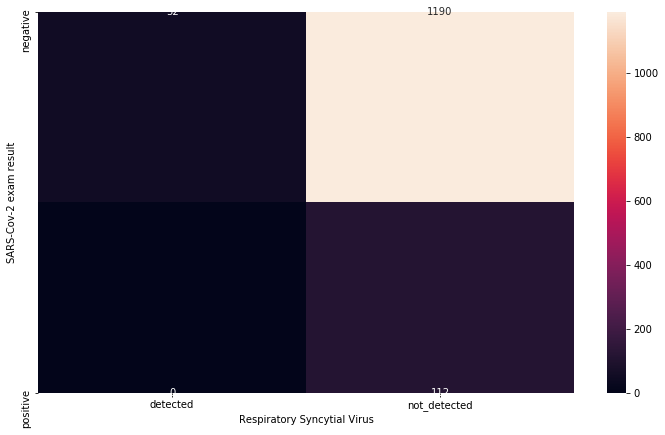

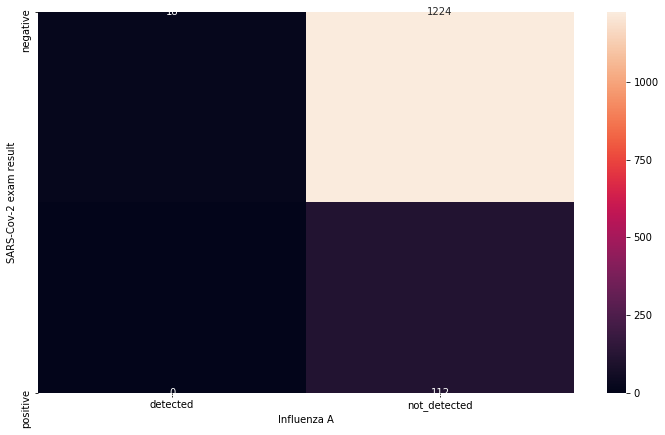

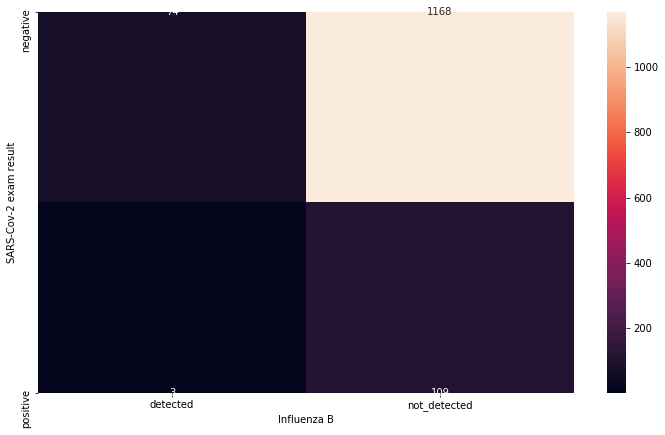

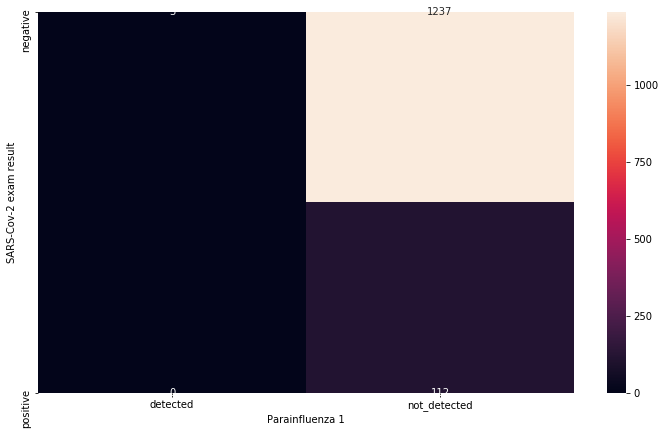

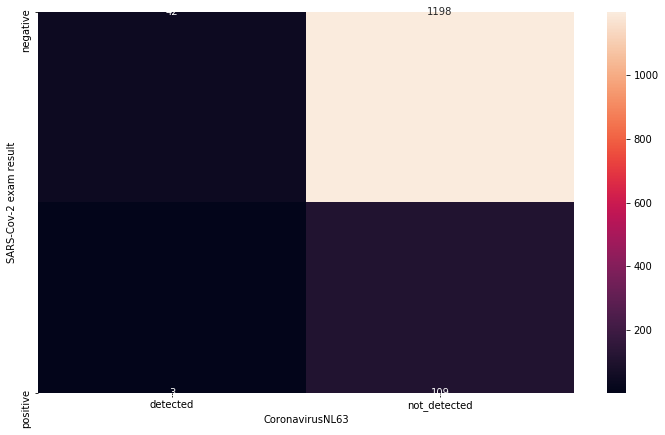

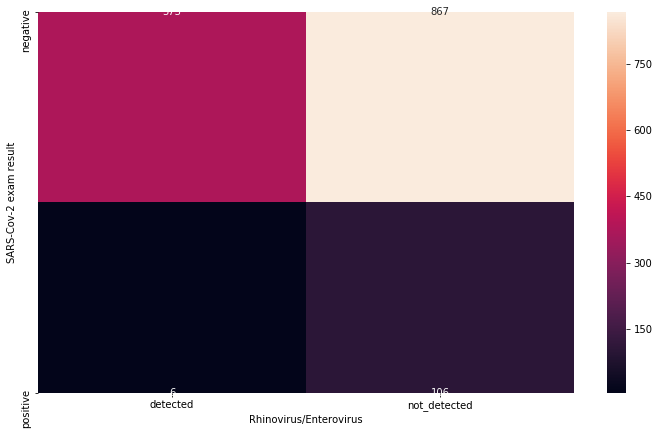

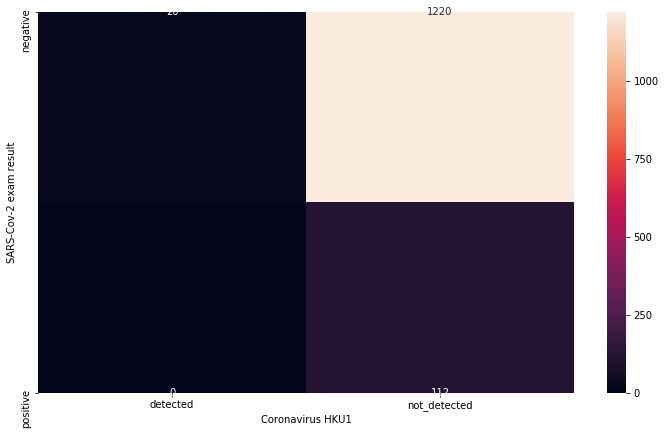

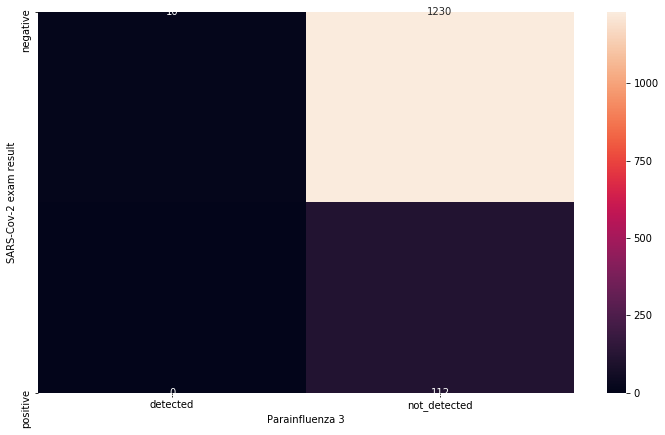

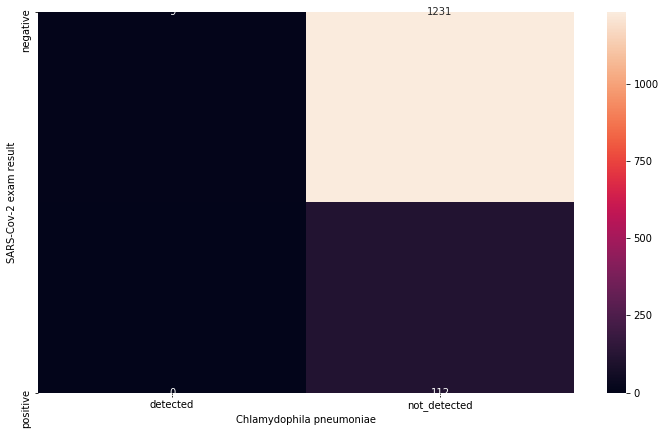

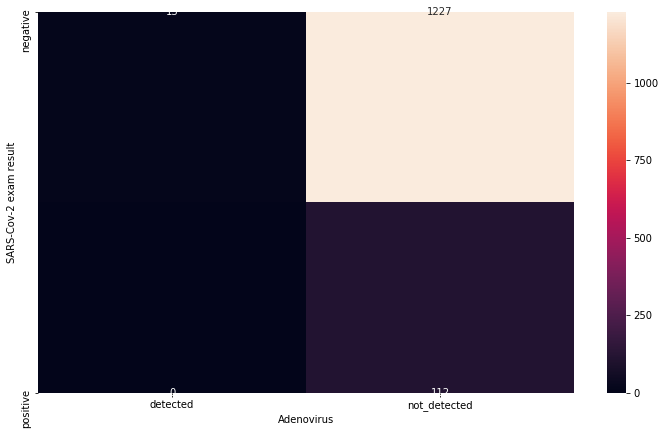

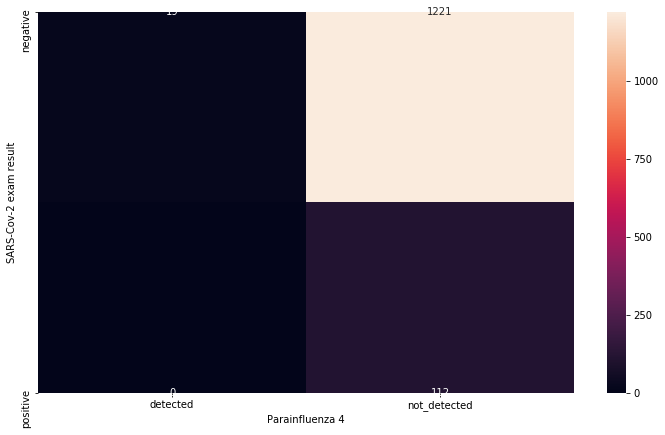

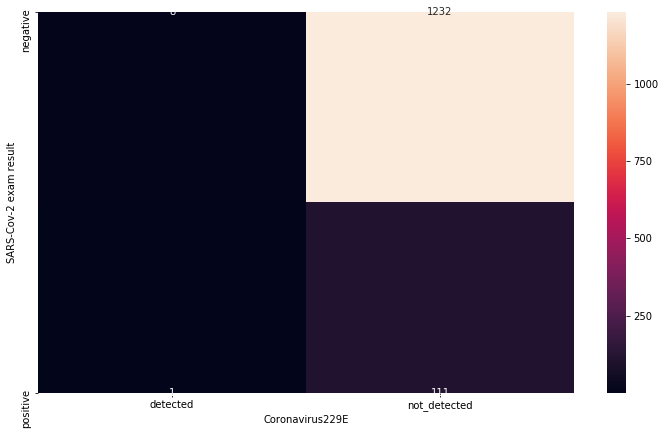

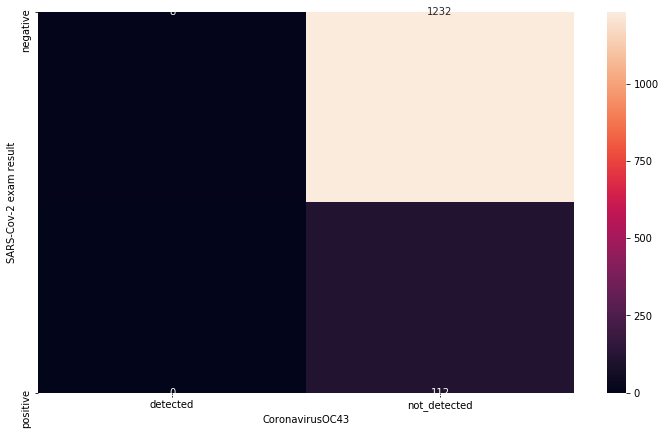

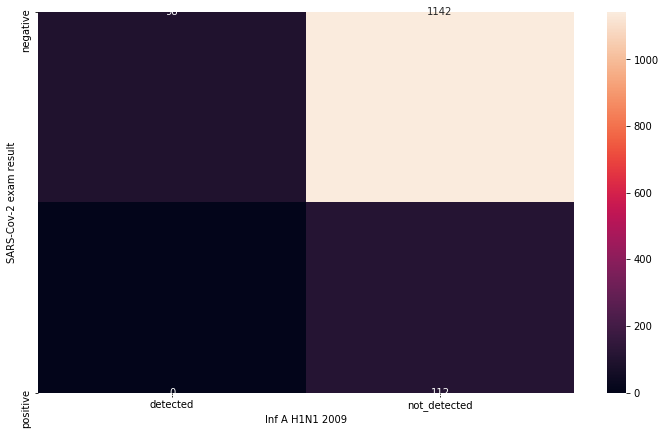

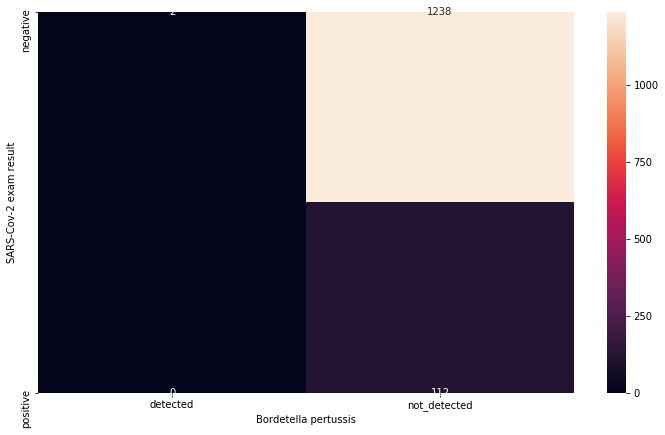

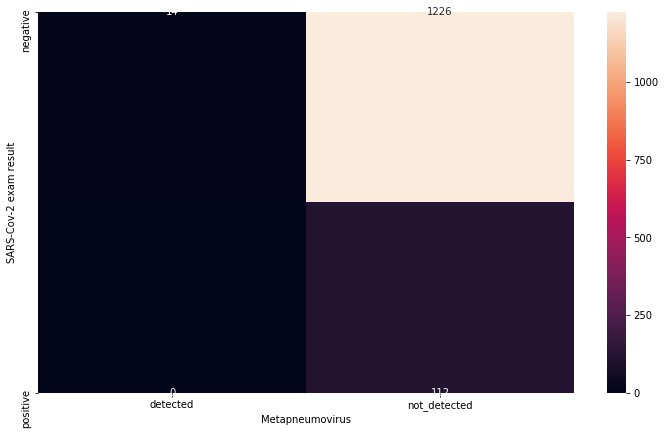

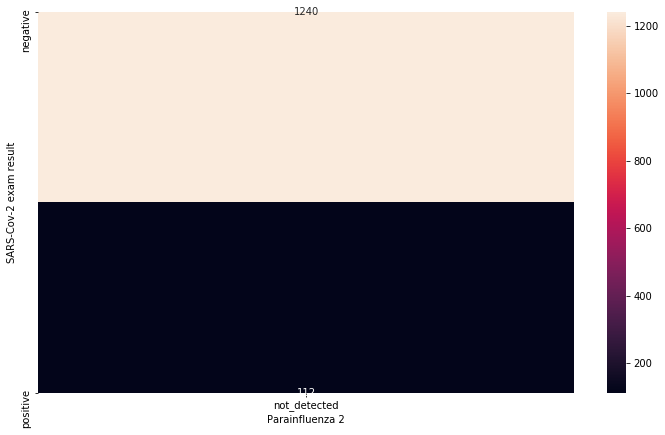

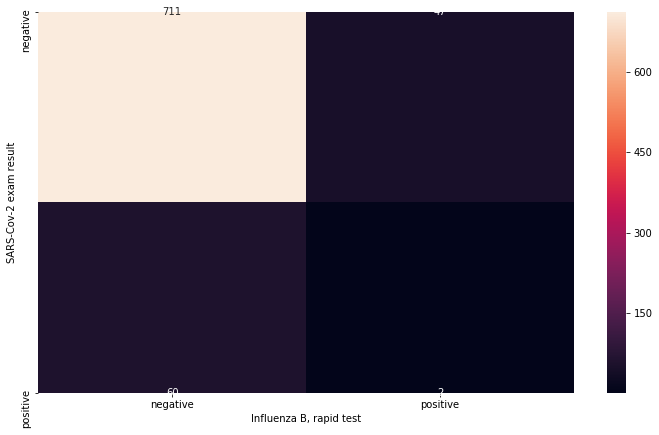

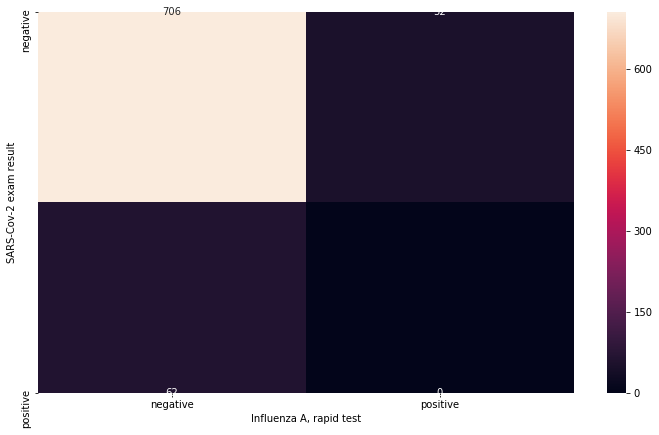

In [88]:
#analyse target(SARS-Cov-2 exam result) et ensemble2
##ces graphe representent le taux des individus teste positive ou negative covid-19 en fonction des differentes 
#element du sous ensemble2( detected ou not detected aux autres virus differentes du covid 19)
for i in ensemble2:
    plt.figure(figsize=(12,7))
    sns.heatmap(pd.crosstab(dcy['SARS-Cov-2 exam result'], dcy[i]), annot=True, fmt='d')


### Apres l'analyse de ces differentes graphe , on constat que le resultat du test covid(negatif ou positif)ne depand pas du fait d'individus soient detecte ou non a un autre virus que le covid-19
### d'ou tout ces virus presente dans l'ensemble2   ne aucun lien avec le covid-19.

## conclusion (Exploitation et Analyse du dataset)
#### l'exploitation et l'analyse de ce dataset nous a permit de decouvrir les variables utiles ou liees au covid-19 que nous pourons utiliser pour le developpement de modele machine learning pour faire notre prediction
#### passons maintenant au pre-traitement des donnees

# 2-pre-traitement - preprocessing (Nettoyage - Encodage   -TrainTest )

## Nettoyage du dataset

In [89]:
#Etant donne que les elements de l'ensemble2 ne sont peut etre pas lies au covid , nous allons eleminer du dataset 
#et reformer le dataset

key_col=['Patient age quantile', 'SARS-Cov-2 exam result']


dcy = dcy[ key_col + list(ensemble1)]
dcy.head(20)



,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
9,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#netoyer des donnee manquantes
dcy = dcy.dropna(axis=0)
dcy

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
8,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
15,9,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
18,11,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
22,9,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
5614,19,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
5615,15,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
5618,17,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160


In [95]:
#dimensions du dataset sans donnees manquantes
dcy.shape

(598, 16)

## Encodage

In [92]:
# transformer les donnees du colonne dcy['SARS-Cov-2 exam result'] en donnees biniaire
dcy['SARS-Cov-2 exam result']=dcy['SARS-Cov-2 exam result'].map({'negative':0,'positive':1})
dcy['SARS-Cov-2 exam result']


1       0
8       0
15      0
18      0
22      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: SARS-Cov-2 exam result, Length: 598, dtype: int64

In [93]:
dcy['SARS-Cov-2 exam result'].value_counts()

0    517
1     81
Name: SARS-Cov-2 exam result, dtype: int64

In [101]:
#on va definir notre x , y pour la prediction 
#x contient tout les donnes du dataset sauf les donnees  du colonne SARS-Cov-2 exam result
#y contient les donnes du colonne SARS-Cov-2 exam result

x = dcy.drop('SARS-Cov-2 exam result', axis=1)
y = dcy['SARS-Cov-2 exam result']


## Train_Test

In [102]:
# le traint_test va nous permettre de diviser notre x,y en deux (le train et test),le train va nous permettre 
#d'entrainer nos donnees avec les modeles machine learning et le test pour fait la prediction
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [107]:
y_train.value_counts()

0    410
1     68
Name: SARS-Cov-2 exam result, dtype: int64

In [108]:
y_test.value_counts()

0    107
1     13
Name: SARS-Cov-2 exam result, dtype: int64

## conclusion (pre-traitement)
#### ici nous avons pu traite nos donnees en le nettoyant, encodant et en utilisant la train_test pour pouvoir diviser a des parties train et test (pour l'entraitenent et l'evalution du modele ML) 
#### passons maintenant  a la modelisation

# 3- modelisation

In [186]:
# importe les differents modeles ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [187]:
#nous allons creer ici 4 modele de ML qu'on pourra entrainer 
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
Decision = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [269]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
#passons a l'evaluation de ces modeles 
def evaluation(model):
    model.fit(x_train,y_train)
    print('le sore de l evaluation est == ',model.score(x_test,y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    

In [270]:
evaluation(RandomForest)

le sore de l evaluation est ==  0.9083333333333333
[[100   7]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.46      0.46      0.46        13

    accuracy                           0.88       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.88      0.88      0.88       120



In [271]:
evaluation(Decision)

le sore de l evaluation est ==  0.8666666666666667
[[100   7]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.46      0.46      0.46        13

    accuracy                           0.88       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.88      0.88      0.88       120



In [272]:
evaluation(SVM)

le sore de l evaluation est ==  0.9166666666666666
[[100   7]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.46      0.46      0.46        13

    accuracy                           0.88       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.88      0.88      0.88       120



In [273]:
evaluation(KNN)

le sore de l evaluation est ==  0.8666666666666667
[[100   7]
 [  7   6]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.46      0.46      0.46        13

    accuracy                           0.88       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.88      0.88      0.88       120



#### Apres entrainement et evalution de ces modeles on constate que le score du modele SVM est éleve par rapport au s'autres modeles
#### nous allons choisir ce modele et l'optimiser avec RandomizedSearchCV afin d'ameliorer sont score d'evaluation

In [274]:
# optimisation
from sklearn.model_selection import RandomizedSearchCV


In [275]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x1a2f392560>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', ma

In [282]:

hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
             'pipeline__selectkbest__k': range(45, 60)}


In [286]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=10,
                          n_iter=41)


In [287]:
grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)


{'svc__gamma': 0.001, 'svc__C': 3000, 'pipeline__selectkbest__k': 45, 'pipeline__polynomialfeatures__degree': 3}


/Users/nan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [288]:
#on evalution le mellieur estimation de grid
evaluation(grid.best_estimator_)

le sore de l evaluation est ==  0.8916666666666667
[[102   5]
 [  8   5]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       107
           1       0.50      0.38      0.43        13

    accuracy                           0.89       120
   macro avg       0.71      0.67      0.69       120
weighted avg       0.88      0.89      0.89       120



### le score d'evaluation apres l'optimisation a inferieur a son score precedent

### on va prendre le SVM pour faire notre prediction suivantes

In [289]:
y_pred = SVM.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1]
